# Basic Network

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Dense, Embedding, Flatten
from sklearn.model_selection import train_test_split

Using Theano backend.
Using gpu device 0: GeForce GT 630M (CNMeM is disabled, cuDNN not available)


## Data

In [3]:
data_file = "../data/processed/stacking-data.h5"
df = pd.read_hdf(data_file, "data")

Merge all models for `onset_log_score` over all regions

In [4]:
X = df["onset_log_score"].index.get_level_values("analysis_time_season_week").values
y = df["onset_log_score"].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

## Model

In [5]:
model = Sequential()

# Embedd weeks to a dense space
model.add(Embedding(54, 10, input_length=1))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation("tanh"))
model.add(Dense(y.shape[1]))
                 
model.compile(loss="mse", optimizer="rmsprop")

In [6]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_1 (Embedding)          (None, 1, 10)         540         embedding_input_1[0][0]          
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 10)            0           embedding_1[0][0]                
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 10)            110         flatten_1[0][0]                  
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 10)            0           dense_1[0][0]                    
___________________________________________________________________________________________

In [7]:
# Not using test splits as of now
history = model.fit(X, y, nb_epoch=30, validation_split=0.1, verbose=0)

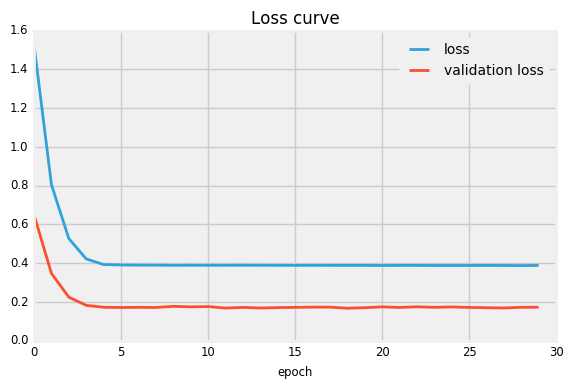

In [8]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("epoch")
plt.title("Loss curve")
plt.show()

## Weekly weights

In [9]:
weeks = np.arange(10, 40) # Only these weeks are available
weights = model.predict(weeks)

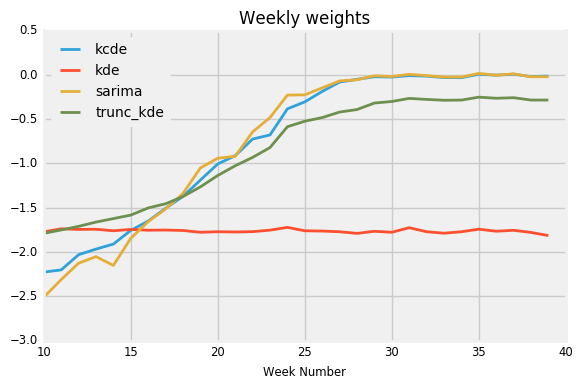

In [10]:
for idx, label in enumerate(df["onset_log_score"].columns):
    plt.plot(weeks, weights[:, idx], label=label)
    
plt.legend(loc="upper left")
plt.xlabel("Week Number")
plt.title("Weekly weights")
plt.show()